# Análise de sinais e gráfico da função

Primeiro construímos uma tabela de sinais em pontos igualmente espaçados no intervalo X, e depois plotamos a função para identificar graficamente a raiz.

In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Definição da função
def f(x):
    return 5*x**3 - 8*x - 0.5

## Construindo a tabela
Algoritmo para gerar uma tabela de intervalos com comprimentos x para achar a variação de sinal, o que indica a presença de raízes em cada varição de sinal

In [3]:
def encontra_intervalos(f, a, b, h=0.5, amostragem=20):
    """
    Encontra intervalos de comprimento h que contenham raízes de f(x).
    
    - f: função alvo
    - a, b: limites de busca
    - h: comprimento do intervalo
    - amostragem: nº de subdivisões dentro do intervalo para detectar múltiplas raízes
    """
    intervalos_raizes = []
    pontos = np.arange(a, b+h, h)

    print(f"{'Intervalo':>15} | {'f(a)':>10} | {'f(b)':>10} | {'Raiz?':>8}")
    print("-"*55)

    for i in range(len(pontos)-1):
        x0, x1 = float(pontos[i]), float(pontos[i+1])
        f0, f1 = f(x0), f(x1)
        
        # subdivisão interna para garantir unicidade
        xs = np.linspace(x0, x1, amostragem)
        fs = [f(float(x)) for x in xs]
        
        # conta quantas vezes o sinal muda dentro do intervalo
        mudancas = np.sum(np.sign(fs[:-1]) * np.sign(fs[1:]) < 0)
        
        raiz_flag = "Não"
        if f0 == 0:
            intervalos_raizes.append((x0, x0))
            raiz_flag = "Raiz exata"
        elif f1 == 0:
            intervalos_raizes.append((x1, x1))
            raiz_flag = "Raiz exata"
        elif mudancas == 1:   # uma única raiz
            intervalos_raizes.append((x0, x1))
            raiz_flag = "Sim (única)"
        elif mudancas > 1:   # mais de uma raiz
            raiz_flag = f"{mudancas} raízes"
        
        print(f"[{x0:5.2f}, {x1:5.2f}] | {f0:10.4f} | {f1:10.4f} | {raiz_flag:>8}")
    
    return intervalos_raizes


# Exemplo de uso
intervalos = encontra_intervalos(f, -3, 3, h=0.5)
print("\nIntervalos com raiz:", [(float(a), float(b)) for (a,b) in intervalos])

      Intervalo |       f(a) |       f(b) |    Raiz?
-------------------------------------------------------
[-3.00, -2.50] |  -111.5000 |   -58.6250 |      Não
[-2.50, -2.00] |   -58.6250 |   -24.5000 |      Não
[-2.00, -1.50] |   -24.5000 |    -5.3750 |      Não
[-1.50, -1.00] |    -5.3750 |     2.5000 | Sim (única)
[-1.00, -0.50] |     2.5000 |     2.8750 |      Não
[-0.50,  0.00] |     2.8750 |    -0.5000 | Sim (única)
[ 0.00,  0.50] |    -0.5000 |    -3.8750 |      Não
[ 0.50,  1.00] |    -3.8750 |    -3.5000 |      Não
[ 1.00,  1.50] |    -3.5000 |     4.3750 | Sim (única)
[ 1.50,  2.00] |     4.3750 |    23.5000 |      Não
[ 2.00,  2.50] |    23.5000 |    57.6250 |      Não
[ 2.50,  3.00] |    57.6250 |   110.5000 |      Não

Intervalos com raiz: [(-1.5, -1.0), (-0.5, 0.0), (1.0, 1.5)]


## Gráfico da função
Agora vamos plotar $f(x)$ no intervalo [0, 10] e marcar o ponto onde ela cruza o eixo x (raiz aproximada).

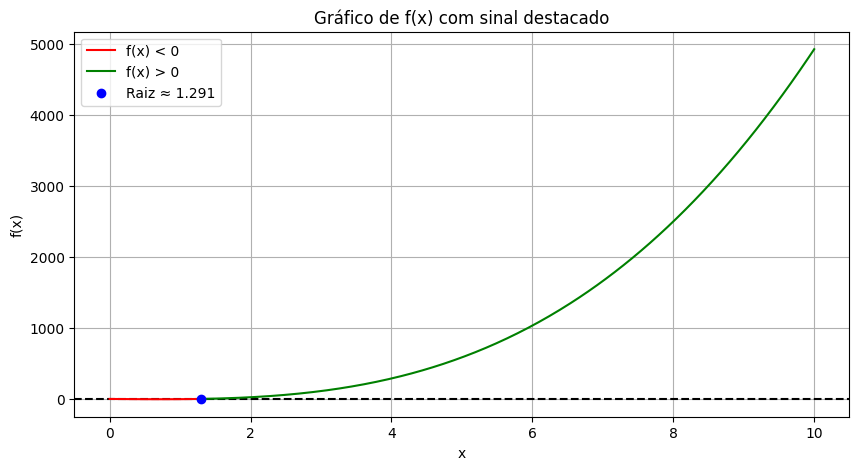

In [7]:
# Vetor de pontos para o gráfico
x_vals = np.linspace(0, 10, 400)
y_vals = np.array([f(x) for x in x_vals])

# Plot da função com coloração por sinal
plt.figure(figsize=(10,5))
plt.axhline(0, color='black', linestyle='--')

# Parte negativa (vermelho)
plt.plot(x_vals[y_vals < 0], y_vals[y_vals < 0], color="red", label="f(x) < 0")
# Parte positiva (verde)
plt.plot(x_vals[y_vals > 0], y_vals[y_vals > 0], color="green", label="f(x) > 0")

# Raiz aproximada grosseiramente
for i in range(len(x_vals)-1):
    if y_vals[i] * y_vals[i+1] < 0:
        x_raiz = (x_vals[i] + x_vals[i+1]) / 2
        plt.scatter(x_raiz, f(x_raiz), color="blue", zorder=5, label=f"Raiz ≈ {x_raiz:.3f}")
        break

plt.title("Gráfico de f(x) com sinal destacado")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Observação
A curva mostra claramente que $f(x)$ começa negativa em $x=0$ e cruza o eixo $x$ próximo de $x \approx 2.3$, onde se encontra a raiz. Esse valor pode ser refinado usando o **método da bissecção** ou outro método numérico (Newton-Raphson, Secante etc.).

## Resolvendo raízes com o método da bissecção
Usaremos o critério de parada |f(p)| < tolerância (2º critério).

In [8]:
def bissecao3(f, a, b, tol=1e-6, max_iter=100):
    """
    Método da bissecção com critério de parada |f(p)| < tol.
    Retorna (raiz_aprox, historico).
    """
    if a > b:
        a, b = b, a
    fa, fb = f(a), f(b)
    if fa == 0:
        return a, [a]
    if fb == 0:
        return b, [b]
    if fa * fb > 0:
        raise ValueError("Intervalo não possui mudança de sinal (f(a)*f(b) > 0).")
    historico = []
    p = None
    for _ in range(max_iter):
        p = 0.5 * (a + b)
        fp = f(p)
        historico.append(p)
        if abs(fp) < tol:
            return p, historico
        if fa * fp < 0:
            b, fb = p, fp
        else:
            a, fa = p, fp
    return p, historico

In [20]:
# Resolver raízes nos intervalos detectados
try:
    intervalos
except NameError:
    intervalos = encontra_intervalos(f, -3, 3, h=0.5)

raizes = []
for (a, b) in intervalos:
    if a == b:  # raiz exata
        raizes.append(a)
    else:
        try:
            # r, hist = bissecao3(f, a, b, tol=1e-6, max_iter=100)
            r, hist = bissecao_flex(f, a, b, tol=1e-6, max_iter=100, mode='func')
            # r, hist = bissecao_flex(f, a, b, tol=1e-6, max_iter=100, mode='intervalo')
            raizes.append(r)
        except ValueError:
            pass

# Deduplicar raízes próximas
raizes = sorted(raizes)
raizes_unicas = []
eps = 1e-5
for r in raizes:
    if not raizes_unicas or abs(r - raizes_unicas[-1]) > eps:
        raizes_unicas.append(r)

print("Raízes aproximadas:")
for r in raizes_unicas:
    print(f"x ≈ {r:.8f} \t f(x) ≈ {f(r): .2e}")

Raízes aproximadas:
x ≈ -1.23241997 	 f(x) ≈ -9.13e-07
x ≈ -0.06265378 	 f(x) ≈  5.04e-07
x ≈ 1.29507363 	 f(x) ≈  1.04e-07


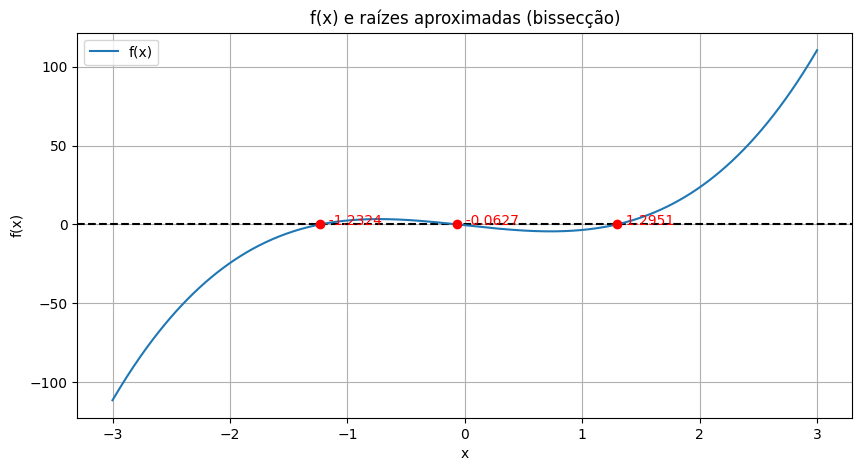

In [13]:
# Plot opcional marcando as raízes encontradas
x_plot = np.linspace(-3, 3, 600)
y_plot = np.array([f(x) for x in x_plot])
plt.figure(figsize=(10,5))
plt.axhline(0, color='black', linestyle='--')
plt.plot(x_plot, y_plot, label='f(x)')
if 'raizes_unicas' in globals():
    for r in raizes_unicas:
        plt.scatter(r, f(r), color='red', zorder=5)
        plt.text(r, f(r), f"  {r:.4f}", color='red')
plt.title('f(x) e raízes aproximadas (bissecção)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

## Critérios de parada alternativos para a bissecção
Vamos disponibilizar 3 opções de parada:
- "func": parar quando |f(p)| < tol;
- "intervalo": parar quando (b - a)/2 < tol;
- "ambos": parar quando qualquer um dos dois ocorrer.

In [11]:
def bissecao_flex(f, a, b, tol=1e-6, max_iter=100, mode="func"):
    """
    Bissecção com modos de parada:
      - mode="func": para quando |f(p)| < tol
      - mode="intervalo": para quando (b - a)/2 < tol
      - mode="ambos": para quando |f(p)| < tol OU (b - a)/2 < tol
    Retorna (p, historico)
    """
    if a > b:
        a, b = b, a
    fa, fb = f(a), f(b)
    if fa == 0:
        return a, [a]
    if fb == 0:
        return b, [b]
    if fa * fb > 0:
        raise ValueError("Intervalo não possui mudança de sinal (f(a)*f(b) > 0).")

    historico = []
    p = None
    for _ in range(max_iter):
        p = 0.5 * (a + b)
        fp = f(p)
        historico.append(p)

        stop_func = abs(fp) < tol
        stop_intervalo = 0.5 * (b - a) < tol

        if mode == "func" and stop_func:
            return p, historico
        if mode == "intervalo" and stop_intervalo:
            return p, historico
        if mode == "ambos" and (stop_func or stop_intervalo):
            return p, historico

        if fa * fp < 0:
            b, fb = p, fp
        else:
            a, fa = p, fp
    return p, historico

In [14]:
# Demonstração em um intervalo com mudança de sinal
if 'intervalos' not in globals():
    intervalos = encontra_intervalos(f, -3, 3, h=0.5)

# pega o primeiro intervalo válido
intervalo_valido = None
for (a, b) in intervalos:
    if a != b and f(a) * f(b) < 0:
        intervalo_valido = (a, b)
        break

if intervalo_valido:
    a, b = intervalo_valido
    r1, _ = bissecao_flex(f, a, b, tol=1e-6, mode='func')
    r2, _ = bissecao_flex(f, a, b, tol=1e-6, mode='intervalo')
    r3, _ = bissecao_flex(f, a, b, tol=1e-6, mode='ambos')
    print(f"Intervalo: [{a}, {b}]")
    print(f"func     -> x ≈ {r1:.8f}, f(x) ≈ {f(r1): .2e}")
    print(f"intervalo-> x ≈ {r2:.8f}, f(x) ≈ {f(r2): .2e}")
    print(f"ambos    -> x ≈ {r3:.8f}, f(x) ≈ {f(r3): .2e}")
else:
    print("Nenhum intervalo válido encontrado.")

Intervalo: [-1.5, -1.0]
func     -> x ≈ -1.23241997, f(x) ≈ -9.13e-07
intervalo-> x ≈ -1.23241901, f(x) ≈  1.32e-05
ambos    -> x ≈ -1.23241997, f(x) ≈ -9.13e-07
